In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
housing_raw = pd.read_csv("Mumbai.csv")

In [4]:
housing_raw.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [5]:
housing = housing_raw.drop(['Unnamed: 0'], axis = 'columns')

In [6]:
housing.head()

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
housing.Location.value_counts()

Kharghar             533
Thane West           418
Mira Road East       390
Ulwe                 319
Borivali West        176
                    ... 
worli sea face         1
Sea Face               1
Shiv Sagar Estate      1
Natakwala Lane         1
Padle Gaon             1
Name: Location, Length: 413, dtype: int64

In [9]:
housing.Location = housing.Location.apply(lambda x : x.strip())

In [10]:
Location_stats = housing['Location'].value_counts(ascending=False)
Location_stats

Kharghar             533
Thane West           418
Mira Road East       390
Ulwe                 319
Borivali West        176
                    ... 
worli sea face         1
Sea Face               1
Shiv Sagar Estate      1
Natakwala Lane         1
Padle Gaon             1
Name: Location, Length: 413, dtype: int64

In [11]:
Location_stats.values.sum()

6347

In [12]:
len(Location_stats[Location_stats<=10])

324

In [13]:
Location_stats_less_than_10 = Location_stats[Location_stats<=10]
Location_stats_less_than_10

Sector 19 Kharghar    10
Sion                  10
Majiwada              10
Sector12 Kamothe       9
kandivali              9
                      ..
worli sea face         1
Sea Face               1
Shiv Sagar Estate      1
Natakwala Lane         1
Padle Gaon             1
Name: Location, Length: 324, dtype: int64

In [14]:
housing.Location = housing.Location.apply(lambda x : 'other' if x in Location_stats_less_than_10 else x)

In [15]:
housing.head(10)

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
5,17000000,2000,Kharghar,4,0,1,1,1,1,1,1,1,1,1,0,0,1,1
6,12500000,1550,Kharghar,3,0,0,1,1,1,1,0,0,1,1,0,1,0,0
7,10500000,1370,other,3,0,0,1,1,1,1,0,0,1,0,0,0,0,0
8,10500000,1356,Kharghar,3,0,1,1,1,1,1,0,1,1,0,0,0,1,1
9,15000000,1680,Kharghar,3,0,1,1,1,1,1,1,1,1,1,1,1,1,1


# Dummy Variables

In [16]:
dummies = pd.get_dummies(housing.Location)
dummies.head()

,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Badlapur East,Bandra East,Bandra West,Belapur,...,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#Concating the dummy dataframe with the original one
housing1 = pd.concat([housing,dummies.drop('other',axis='columns')],axis='columns')
housing1.head()

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,4850000,720,Kharghar,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Dropping the Location column as we have already created dummy variables for the column
housing1.drop(['Location'],axis='columns',inplace=True)

In [19]:
housing1.head()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
0,4850000,720,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4500000,600,1,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,6700000,650,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4500000,650,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5000000,665,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


# Using Decision Trees

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
dt = DecisionTreeRegressor(random_state=42, max_depth=13, min_samples_leaf=8)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
np.random.seed(0)
df_train, df_test = train_test_split(housing1, train_size=0.7, random_state=100)

In [24]:
df_train.shape, df_test.shape

((4442, 106), (1905, 106))

In [25]:
df_test.head()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
1300,2700000,540,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6007,12000000,1375,3,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1575,4500000,560,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2404,31500000,1250,3,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2723,21000000,910,2,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_train.head()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,...,Vashi,Ville Parle East,Virar,Virar East,Virar West,Wadala,Wadala East Wadala,Worli,matunga east,mumbai
1769,11000000,1100,2,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5532,17900000,1400,3,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1815,11000000,1150,2,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
130,5100000,700,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1666,11000000,650,1,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
df_train['Price'] = scaler.fit_transform(df_train[['Price']])
df_test['Price'] = scaler.transform(df_test[['Price']])

In [30]:
df_train.Price.describe()

count    4442.000000
mean        0.032145
std         0.050287
min         0.000000
25%         0.007895
50%         0.017943
75%         0.038038
max         1.000000
Name: Price, dtype: float64

In [31]:
y_train = df_train.pop("Price")
X_train = df_train

y_test = df_test.pop("Price")
X_test = df_test

In [32]:
X_test.shape, X_train.shape

((1905, 105), (4442, 105))

# Fit the DT model

In [33]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=13, min_samples_leaf=8, random_state=42)


(process:1124): GLib-GIO-WARNING **: 23:56:29.071: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2303.17.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs



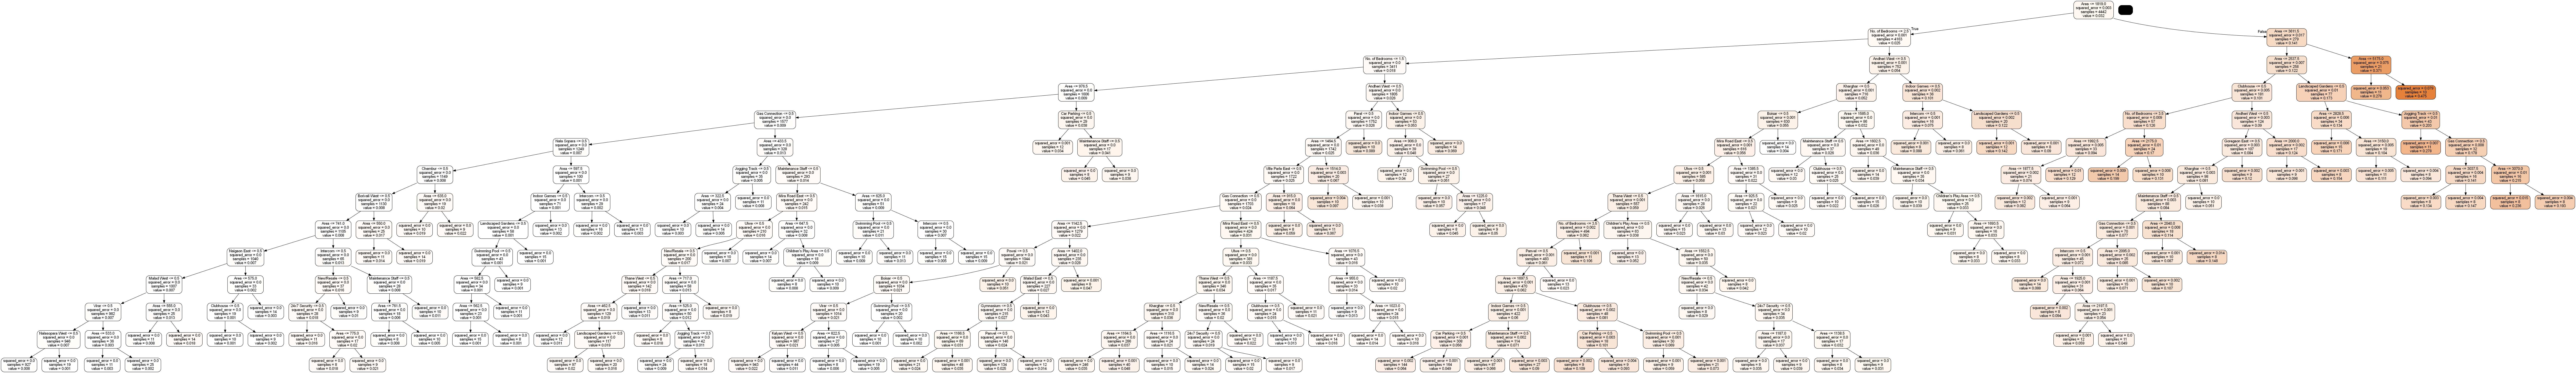

In [34]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [35]:
y_train_pred = dt.predict(X_train)

In [36]:
from sklearn.metrics import r2_score

In [37]:
r2_score(y_train, y_train_pred)

0.6783207615531559

In [38]:
y_test_pred = dt.predict(X_test)

In [39]:
r2_score(y_test, y_test_pred)

0.6166991717726413

# Using Random Forest Regressor¶

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, min_samples_leaf=10)

In [42]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                      random_state=42)

In [43]:
sample_tree = rf.estimators_[20]

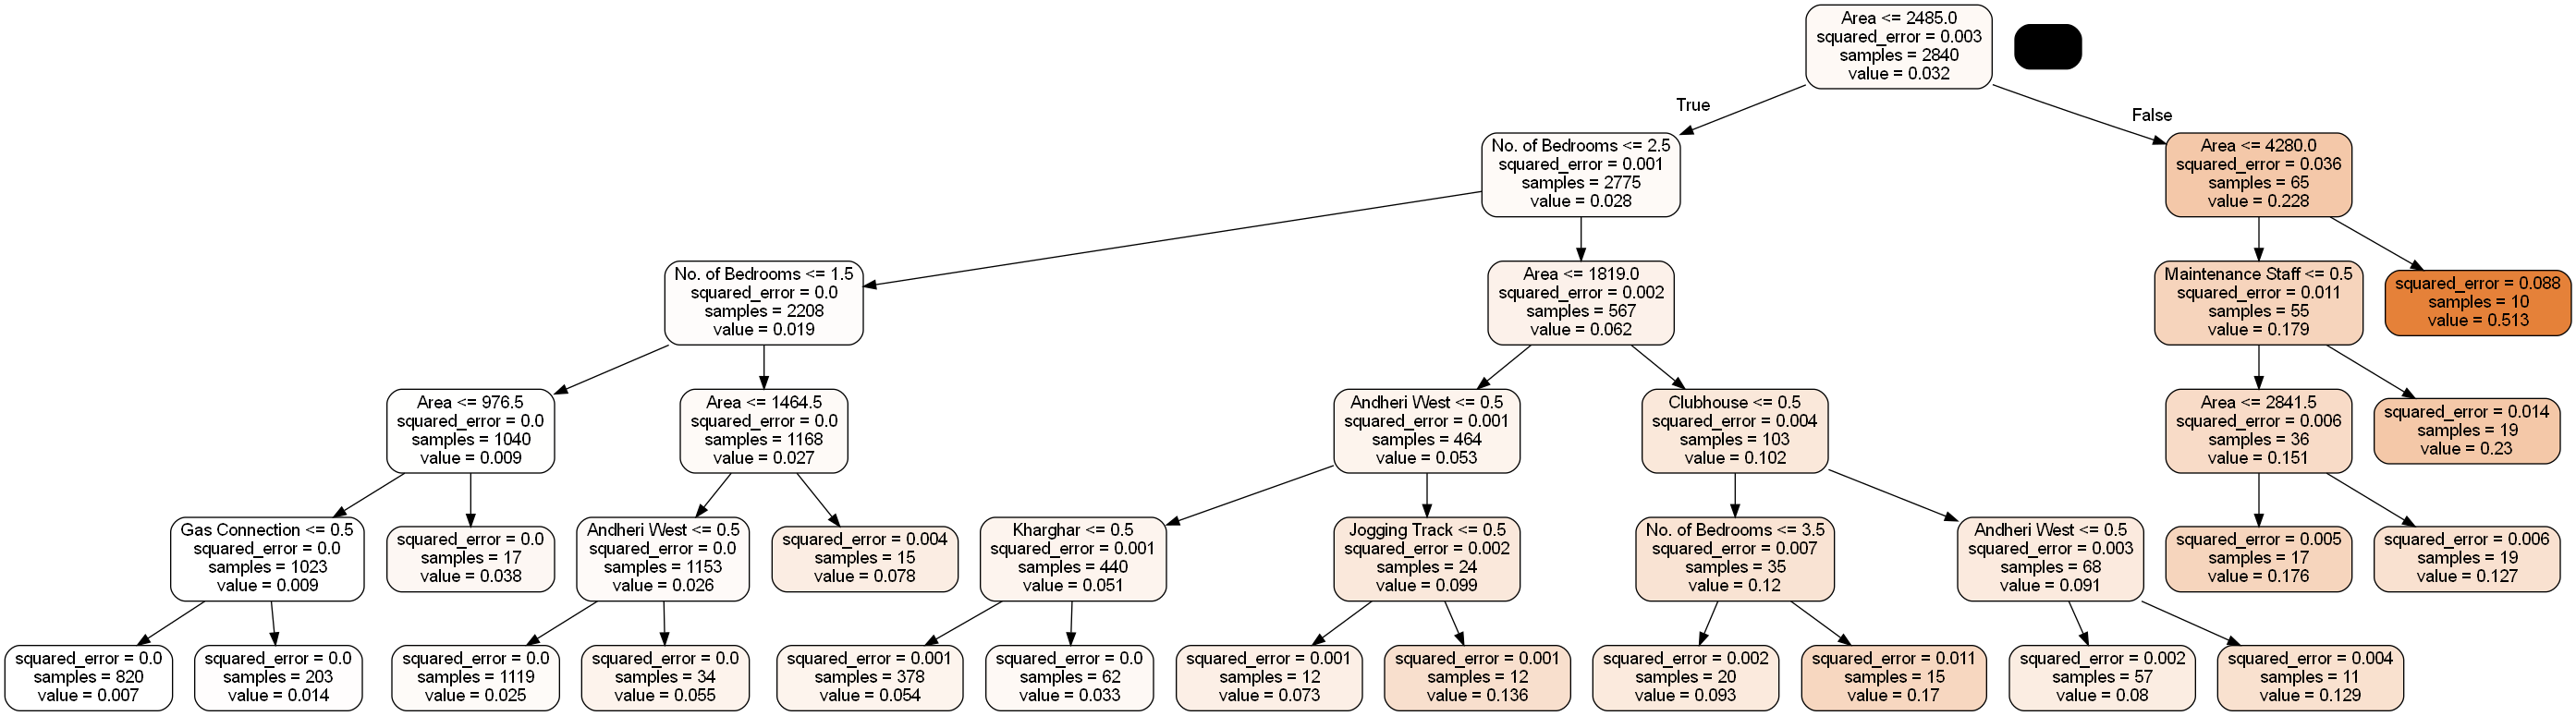

In [44]:
dot_data = StringIO()
export_graphviz(sample_tree, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [45]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [46]:
r2_score(y_train, y_train_pred)

0.6143304585056781

In [47]:
r2_score(y_test, y_test_pred)

0.6197643153188186

In [48]:
rf.feature_importances_

array([7.19465864e-01, 2.07364675e-01, 3.09398112e-03, 3.61428533e-03,
       1.02580831e-04, 1.44830634e-03, 4.91365254e-03, 1.04365934e-03,
       1.86850918e-04, 7.63367711e-03, 4.16548437e-04, 1.07117034e-02,
       2.72110029e-03, 6.02952170e-03, 3.54727614e-03, 1.56156028e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.60637332e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.42797287e-03, 0.00000000e+00, 0.00000000e+00,
       9.32514758e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.40781370e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [49]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_})

In [50]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,Area,0.719466
1,No. of Bedrooms,0.207365
21,Andheri West,0.016064
11,Landscaped Gardens,0.010712
9,Clubhouse,0.007634
...,...,...
44,Ghatkopar West,0.000000
43,Ghatkopar,0.000000
42,Ghansoli,0.000000
41,Dronagiri,0.000000


In [51]:
?DecisionTreeRegressor